In [ ]:
# # Import pustaka yang diperlukan
# import numpy as np
# import matplotlib.pyplot as plt
# from keras.datasets import mnist
# from keras.utils import to_categorical

# # Memuat dataset MNIST
# (X_train, y_train), (X_test, y_test) = mnist.load_data()

# # Langkah Preprocessing
# ## Mengubah bentuk data dan normalisasi
# X_train = X_train.reshape(-1, 1, 28, 28).astype('float32') / 255
# X_test = X_test.reshape(-1, 1, 28, 28).astype('float32') / 255

# ## Mengubah label menjadi one-hot encoding
# y_train = to_categorical(y_train, 10)
# y_test = to_categorical(y_test, 10)

# print(f"Bentuk data latih: {X_train.shape}, Bentuk label latih: {y_train.shape}")
# print(f"Bentuk data uji: {X_test.shape}, Bentuk label uji: {y_test.shape}")

# # Definisikan kelas Conv2D, MaxPool2D, dan ANN_Scratch (gunakan kode dari respon sebelumnya)

# class Conv2D:
#     def __init__(self, input_channels, num_filters, kernel_size, stride=(1, 1), use_padding=True, activation='relu'):
#         self.input_channels = input_channels
#         self.num_filters = num_filters
#         self.kernel_size = kernel_size
#         self.stride = stride
#         self.use_padding = use_padding
#         self.activation = activation
        
#         # Inisialisasi filter dan bias
#         self.filters = np.random.randn(num_filters, input_channels, kernel_size, kernel_size) * 0.01
#         self.biases = np.zeros((num_filters, 1))
#         print(f"Conv2D diinisialisasi: num_filters={num_filters}, kernel_size={kernel_size}, stride={stride}, use_padding={use_padding}, activation={activation}")

#     def forward(self, input):
#         self.input = input
#         if self.use_padding:
#             pad_height = (self.kernel_size - 1) // 2
#             pad_width = (self.kernel_size - 1) // 2
#             input_padded = np.pad(input, ((0, 0), (0, 0), (pad_height, pad_height), (pad_width, pad_width)), mode='constant')
#         else:
#             input_padded = input

#         batch_size, input_channels, input_height, input_width = input_padded.shape
#         output_height = (input_height - self.kernel_size) // self.stride[0] + 1
#         output_width = (input_width - self.kernel_size) // self.stride[1] + 1

#         self.output = np.zeros((batch_size, self.num_filters, output_height, output_width))

#         for b in range(batch_size):
#             for f in range(self.num_filters):
#                 for i in range(0, output_height):
#                     for j in range(0, output_width):
#                         vert_start = i * self.stride[0]
#                         vert_end = vert_start + self.kernel_size
#                         horiz_start = j * self.stride[1]
#                         horiz_end = horiz_start + self.kernel_size

#                         input_slice = input_padded[b, :, vert_start:vert_end, horiz_start:horiz_end]
#                         self.output[b, f, i, j] = np.sum(input_slice * self.filters[f]) + self.biases[f]
        
#         self.output = self.apply_activation(self.output)
#         print(f"Conv2D forward pass: input shape={input.shape}, output shape={self.output.shape}")
#         return self.output

#     def apply_activation(self, x):
#         if self.activation == 'relu':
#             return np.maximum(0, x)
#         elif self.activation == 'sigmoid':
#             return 1 / (1 + np.exp(-x))
#         elif self.activation == 'linear':
#             return x  
#         elif self.activation == 'softmax':
#             exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))
#             return exp_x / np.sum(exp_x, axis=1, keepdims=True)
#         else:
#             raise ValueError(f"Unsupported activation function: {self.activation}")


# class MaxPool2D:
#     def __init__(self, pool_size=(2, 2), stride=(2, 2)):
#         self.pool_size = pool_size
#         self.stride = stride
#         print(f"MaxPool2D diinisialisasi: pool_size={pool_size}, stride={stride}")

#     def forward(self, input):
#         self.input = input
#         batch_size, input_channels, input_height, input_width = input.shape
#         output_height = (input_height - self.pool_size[0]) // self.stride[0] + 1
#         output_width = (input_width - self.pool_size[1]) // self.stride[1] + 1

#         self.output = np.zeros((batch_size, input_channels, output_height, output_width))

#         for b in range(batch_size):
#             for c in range(input_channels):
#                 for i in range(0, output_height):
#                     for j in range(0, output_width):
#                         vert_start = i * self.stride[0]
#                         vert_end = vert_start + self.pool_size[0]
#                         horiz_start = j * self.stride[1]
#                         horiz_end = horiz_start + self.pool_size[1]

#                         input_slice = input[b, c, vert_start:vert_end, horiz_start:horiz_end]
#                         self.output[b, c, i, j] = np.max(input_slice)

#         print(f"MaxPool2D forward pass: input shape={input.shape}, output shape={self.output.shape}")
#         return self.output


# class ANN_Scratch:
#     def __init__(self, layers, loss='mse', regularization=None, reg_lambda=0.01, learning_rate=0.01, epochs=1000, batch_size=32):
#         self.layers = layers
#         self.loss = loss
#         self.regularization = regularization
#         self.reg_lambda = reg_lambda
#         self.learning_rate = learning_rate
#         self.epochs = epochs
#         self.batch_size = batch_size
#         print(f"ANN diinisialisasi dengan {len(self.layers)} layers")

#     def forward(self, X):
#         for layer in self.layers:
#             X = layer.forward(X)
#         return X

#     def backward(self, X, y):
#         output = self.forward(X)
#         gradient = self.loss_derivative(y, output)
        
#         for layer in reversed(self.layers):
#             gradient = layer.backward(gradient, self.learning_rate)

#     def fit(self, X, y):
#         for epoch in range(self.epochs):
#             for i in range(0, len(X), self.batch_size):
#                 X_batch = X[i:i+self.batch_size]
#                 y_batch = y[i:i+self.batch_size]
#                 self.backward(X_batch, y_batch)
            
#             if epoch % 10 == 0:
#                 loss = self.calculate_loss(X, y)
#                 print(f"Epoch {epoch}, Loss: {loss}")

#     def predict(self, X):
#         return self.forward(X)

#     def calculate_loss(self, X, y):
#         output = self.forward(X)
#         if self.loss == 'mse':
#             loss = np.mean((y - output) ** 2)
#         elif self.loss == 'binary_crossentropy':
#             output = np.clip(output, 1e-15, 1 - 1e-15)
#             loss = -np.mean(y * np.log(output) + (1 - y) * np.log(1 - output))
#         else:
#             raise ValueError(f"Unsupported loss function: {self.loss}")
        
#         if self.regularization == 'l1':
#             l1_loss = self.reg_lambda * sum(np.sum(np.abs(layer.weights)) for layer in self.layers if hasattr(layer, 'weights'))
#             loss += l1_loss
#         elif self.regularization == 'l2':
#             l2_loss = self.reg_lambda * sum(np.sum(layer.weights ** 2) for layer in self.layers if hasattr(layer, 'weights'))
#             loss += l2_loss
        
#         return loss

#     def loss_derivative(self, y, output):
#         if self.loss == 'mse':
#             return 2 * (output - y) / y.size
#         elif self.loss == 'binary_crossentropy':
#             output = np.clip(output, 1e-15, 1 - 1e-15)
#             return (output - y) / (output * (1 - output))
#         else:
#             raise ValueError(f"Unsupported loss function: {self.loss}")

# # Definisikan arsitektur CNN
# model = ANN_Scratch([
#     Conv2D(input_channels=1, num_filters=6, kernel_size=5, stride=(1, 1), use_padding=True, activation='relu'),
#     MaxPool2D(pool_size=(2, 2), stride=(2, 2)),
#     Conv2D(input_channels=6, num_filters=16, kernel_size=5, stride=(1, 1), use_padding=False, activation='relu'),
#     MaxPool2D(pool_size=(2, 2), stride=(2, 2)),
#     Layer(input_size=16 * 4 * 4, output_size=120, activation='relu'),
#     Layer(input_size=120, output_size=84, activation='relu'),
#     Layer(input_size=84, output_size=10, activation='softmax')
# ])

# # Latih model dengan dataset MNIST
# model.fit(X_train, y_train)

# # Evaluasi model
# predictions = model.predict(X_test)
# accuracy = np.mean(np.argmax(predictions, axis=1) == np.argmax(y_test, axis=1))
# print(f"Test Accuracy: {accuracy:.2f}")

In [1]:
%pip install keras

Note: you may need to restart the kernel to use updated packages.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.utils import to_categorical
import importlib.util
import sys
import os


2024-08-28 17:10:03.312434: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-08-28 17:10:03.552133: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-08-28 17:10:03.580353: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-08-28 17:10:03.615072: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-28 17:10:03.688651: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been 

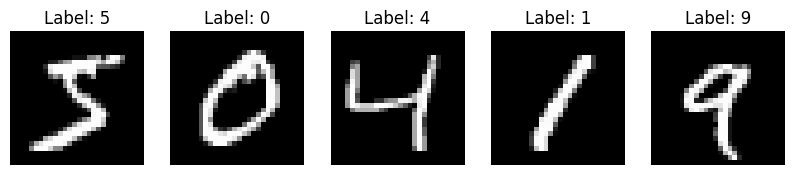

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

def plot_sample_images(X, y, num_samples=5):
    plt.figure(figsize=(10, 2))
    for i in range(num_samples):
        plt.subplot(1, num_samples, i + 1)
        plt.imshow(X[i], cmap='gray')
        plt.title(f"Label: {y[i]}")
        plt.axis('off')
    plt.show()

plot_sample_images(X_train, y_train, num_samples=5)

In [3]:
# Data Preprocessing
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape(-1, 1, 28, 28).astype('float32') / 255
X_test = X_test.reshape(-1, 1, 28, 28).astype('float32') / 255

y_train = y_train.astype(int)
y_test = y_test.astype(int)

Import Model

In [21]:
module_name = "ann-scratch"
module_path = os.path.join('supervised-learning', module_name + '.py') 

spec = importlib.util.spec_from_file_location(module_name, module_path)
ann_module = importlib.util.module_from_spec(spec)
sys.modules[module_name] = ann_module
spec.loader.exec_module(ann_module)

Layer = ann_module.Layer
Conv2DLayer = ann_module.Conv2DLayer 
MaxPooling2DLayer = ann_module.MaxPooling2DLayer  
ANN_Scratch = ann_module.ANN_Scratch
Flatten = ann_module.Flatten

def one_hot_encode(y, num_classes):
    return np.eye(num_classes)[y]

In [22]:
lenet_model = ANN_Scratch([
    Conv2DLayer(num_filters=6, kernel_size=5, input_shape=(1, 28, 28), stride=(1, 1), use_padding=True, activation='relu'),
    MaxPooling2DLayer(pool_size=(2, 2), stride=(2, 2)),
    Conv2DLayer(num_filters=16, kernel_size=5, input_shape=(6, 14, 14), stride=(1, 1), use_padding=False, activation='relu'),
    MaxPooling2DLayer(pool_size=(2, 2), stride=(2, 2)),
    Flatten(),
    Layer(input_size=16*5*5, output_size=120, activation='relu'),
    Layer(input_size=120, output_size=84, activation='relu'),
    Layer(input_size=84, output_size=10, activation='softmax')
], loss='categorical_crossentropy', learning_rate=0.01, epochs=10, batch_size=32)

num_classes = 10
y_train_onehot = one_hot_encode(y_train, num_classes)
y_test_onehot = one_hot_encode(y_test, num_classes)

lenet_model.fit(X_train, y_train_onehot)

lenet_model.fit(X_train, y_train)

lenet_predictions = np.argmax(lenet_model.predict(X_test), axis=1)
accuracy = np.mean(lenet_predictions == y_test)
print(f"LeNet Test Accuracy: {accuracy * 100:.2f}%")

ANN fit - X shape: (60000, 1, 28, 28), y shape: (60000, 10)
Epoch 1/10
  Batch 1 - X_batch shape: (32, 1, 28, 28), y_batch shape: (32, 10)
ANN backward - Input shape: (32, 1, 28, 28), y shape: (32, 10)
ANN forward - Input shape: (32, 1, 28, 28)
Conv2D forward - Input shape: (32, 1, 28, 28)
Conv2D forward - Output shape: (32, 6, 28, 28)
ANN forward - Output shape after layer 0: (32, 6, 28, 28)
MaxPooling forward - Input shape: (32, 6, 28, 28)
MaxPooling forward - Output shape: (32, 6, 14, 14)
ANN forward - Output shape after layer 1: (32, 6, 14, 14)
Conv2D forward - Input shape: (32, 6, 14, 14)
Conv2D forward - Output shape: (32, 16, 10, 10)
ANN forward - Output shape after layer 2: (32, 16, 10, 10)
MaxPooling forward - Input shape: (32, 16, 10, 10)
MaxPooling forward - Output shape: (32, 16, 5, 5)
ANN forward - Output shape after layer 3: (32, 16, 5, 5)
Flatten forward - Input shape: (32, 16, 5, 5)
Flatten forward - Output shape: (32, 400)
ANN forward - Output shape after layer 4: (32,

TypeError: Flatten.backward() takes 2 positional arguments but 4 were given

In [ ]:
predictions_lenet = model_lenet.predict(X_test)
accuracy_lenet = np.mean(np.argmax(predictions_lenet, axis=1) == np.argmax(y_test, axis=1))
print(f"Akurasi Pengujian LeNet: {accuracy_lenet:.2f}")